# Figures

In [1]:
using PyPlot, Random, StatsBase, Distributions 
include("./evodi.jl"); using .evodi

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/olivier.rivoire/.julia/packages/PyPlot/XHEG0/src/init.jl:192


In [2]:
# parameters
c = 0.1
s2M = 0.1
s2V = 0.01
kstar = .5

K_values = [10^i for i in range(2,stop=3,length=10)]
T = 10000
N = 1000
tau = 500
Nstat = 25

25

## Figure 1A

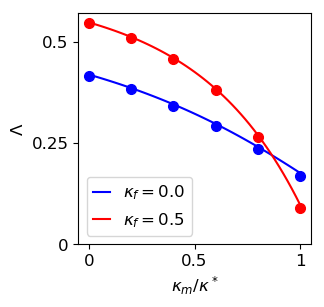

In [3]:
filename = "data_fig1A"
L, L_err = evodi.simu_Lambda_read(filename)

kstar = .5
kf_values = [0,kstar]
km_values = 0:0.1:kstar

km_range = 0:0.01:kstar
colors = ["b","r"]
figure(figsize=(3, 3))
for (kf,col) in zip(kf_values,colors)
    plot(km_range/kstar, [evodi.value_Lambda(kf, km, c, s2M) for km in km_range], col, label=L"\kappa_f="*"$(kf)")
    for km in km_values
        errorbar(km/kstar, L[kf,km], yerr=L_err[kf,km], color=col, marker=".", ms=14)
    end
end
xticks(0:.5:1, ["0","0.5","1"],fontsize=12); yticks(0:0.25:.6, ["0","0.25","0.5"],fontsize=12);
xlabel(L"$\kappa_m/\kappa^*$",fontsize=12); ylabel(L"$\Lambda$",fontsize=12);
legend(loc=3,handlelength=1,fontsize=12);

## Figure 1B

In [4]:
kf_range, km_range = 0:0.01:kstar, 0:0.01:kstar
L_values = zeros((length(kf_range),length(km_range)))

for (i,km) in enumerate(kf_range)
    for (j,kf) in enumerate(km_range)
        L_values[i,j] = evodi.value_Lambda(kf, km, c, s2M)
    end
end

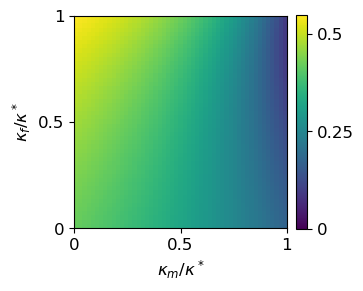

In [5]:
figure(figsize=(3, 3))
imshow(L_values', origin=true, vmin=0, extent=(0.,1, 0., 1))
xticks([0,.5,1],["0","0.5","1"], fontsize=12); yticks([0,.5,1],["0","0.5","1"],fontsize=12)
cbar = colorbar(ticks=[0, 0.25, .5],fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticklabels(["0","0.25","0.5"]);
xlabel(L"$\kappa_m/\kappa^*$",fontsize=12); ylabel(L"$\kappa_f/\kappa^*$",fontsize=12);

## Figure 1C

In [6]:
qf = 4
qm_range = [2^x*qf for x =-2:0.01:2]
kf_opt, km_opt = zeros(length(qm_range)), zeros(length(qm_range))
for (i,qm) in enumerate(qm_range)
    kf_opt[i], km_opt[i], _ = evodi.opt_kfkm(qf, qm, c, s2M)
end

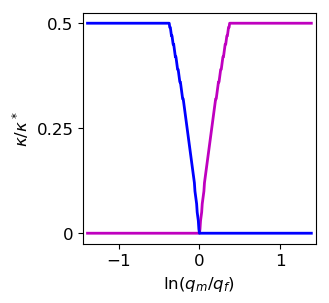

In [7]:
figure(figsize=(3, 3))
plot(log.(qm_range/qf), kf_opt, "m", lw=2, label="       ")
plot(log.(qm_range/qf), km_opt, "b", lw=2, label="       ")
xticks(fontsize=12); yticks(0:0.25:.6, ["0","0.25","0.5"],fontsize=12)
xlim([-1.44,1.44]);
xlabel(L"$\ln(q_m/q_f)$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figures 2A-B-C

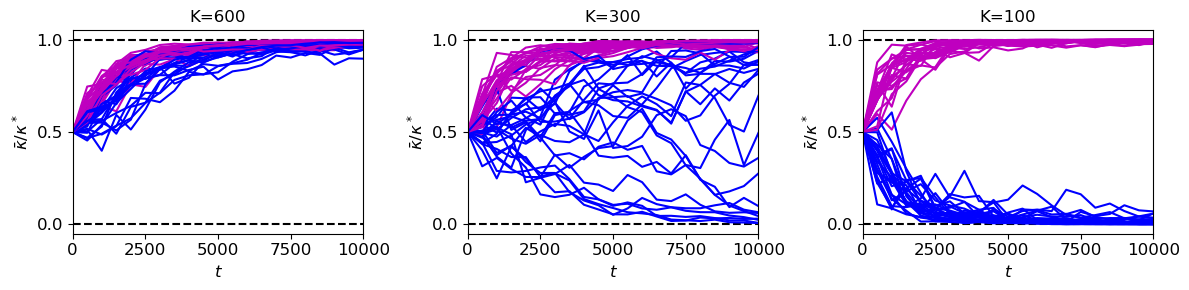

In [8]:
K_range = [100, 300, 600]
filename = "data_fig2ABC"
res = Dict()
open("_Outputs/"*filename*".txt") do f
    for line in eachline(f)
        content = split(line, " ")
        key = (parse(Int,content[1]),parse(Int,content[2]))
        res[key] = reshape([parse(Float64,x) for x in content[3:end]], (2,Int(length(content[3:end])/2)))
    end
end

figure(figsize=(12, 3)); 
for k = 1:length(K_range)
    subplot(1,3,k)
    title("K=$(K_range[4-k])")
    xlim([0,T/tau]); ylim([-0.05,1.05]); 
    xticks(0:5:T/tau, 0:5*tau:T)
    axhline(0, ls="--", color="k")
    axhline(1, ls="--", color="k")
    for i = 1:Nstat
        rstat = res[4-k,i]
        plot(0:size(rstat)[2]-1, rstat[1,:]/kstar, "m")
        plot(0:size(rstat)[2]-1, rstat[2,:]/kstar, "b")
    end
    xticks(fontsize=12); yticks([0,.5,1], fontsize=12);
    xlabel(L"$t$",fontsize=12); ylabel(L"$\bar\kappa/\kappa^*$",fontsize=12);
end
tight_layout();

## Figure 2D

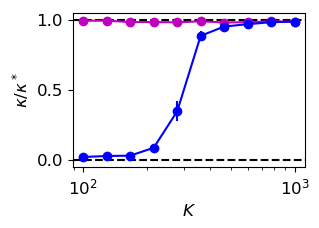

In [9]:
filename = "data_fig2D"
res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)

figure(figsize=(3, 2))
axhline(0, ls="--", color="k")
axhline(1, ls="--", color="k")
errorbar(K_values, [mean(res_kf[K])/kstar for K in K_values], yerr=[std(res_kf[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", markersize=12, color="m")
errorbar(K_values, [mean(res_km[K])/kstar for K in K_values], yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", markersize=12, color="b");
xticks(0:.1:1, fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log");
xlabel(L"$K$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure 2E

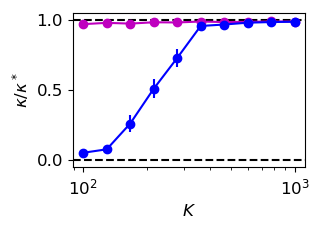

In [10]:
filename = "data_fig2E"
res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)

figure(figsize=(3, 2))
axhline(0, ls="--", color="k")
axhline(1, ls="--", color="k")
errorbar(K_values, [mean(res_kf[K])/kstar for K in K_values], yerr=[std(res_kf[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", markersize=12, color="m")
errorbar(K_values, [mean(res_km[K])/kstar for K in K_values], yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", markersize=12, color="b");
xticks(0:.1:1, fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log");
xlabel(L"$K$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure 2F

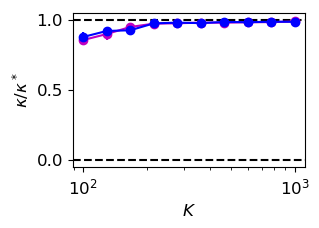

In [11]:
filename = "data_fig2F"
res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)

figure(figsize=(3, 2))
axhline(0, ls="--", color="k")
axhline(1, ls="--", color="k")
errorbar(K_values, [mean(res_kf[K])/kstar for K in K_values], yerr=[std(res_kf[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", markersize=12, color="m")
errorbar(K_values, [mean(res_km[K])/kstar for K in K_values], yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", markersize=12, color="b");
xticks(0:.1:1, fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log");
xlabel(L"$K$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure 3A

In [12]:
filename = "data_fig3A1"
c_range = 0:0.02:.15
DL_v, DL_e = zeros(length(c_range)), zeros(length(c_range))
open("_Outputs/"*filename*".txt") do f
    for (i,line) in enumerate(eachline(f))
        DL_v[i], DL_e[i] = parse(Float64,split(line)[2]), parse(Float64,split(line)[3])
    end
end

filename = "data_fig3A2"
c_range = 0:0.02:.2
K_v, K_e = zeros(length(c_range)), zeros(length(c_range))
open("_Outputs/"*filename*".txt") do f
    for (i,line) in enumerate(eachline(f))
        K_v[i], K_e[i] = parse(Float64,split(line)[2]), parse(Float64,split(line)[3])
    end
end

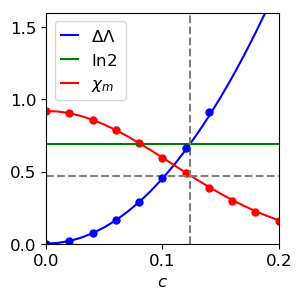

In [13]:
figure(figsize=(3, 3))
kmin = 0.
c_range = 0:0.02:.2
plot(c_range, exp.(K_v), color="r", ls="", marker=".", ms=10)
c_range = 0:0.02:.15
errorbar(c_range, DL_v, yerr=DL_e, color="b", ls="", marker=".", ms=10);
c_range = 0:0.01:.2
plot(c_range, [evodi.value_Lambda(kstar, kmin,  c, s2M) - evodi.value_Lambda(kstar, kstar,  c, s2M) for c in c_range], "b", label=L"$\Delta\Lambda$");
axhline(log(2), color="g", label=L"$\ln 2$ "); 
plot(c_range, [exp(evodi.value_logchi(kstar, kmin, c, s2M, sex="male")) for c in c_range], "r", label=L"$\chi_m$ ");
axvline(evodi.value_c_star(kstar, s2M), color="grey", ls="--")
axhline(exp(evodi.value_logchi(kstar, 0., evodi.value_c_star(kstar, s2M), s2M, sex="male")), color="grey", ls="--")
legend(fontsize=12,handlelength=1); xlim([0,.2]); ylim([0,1.6]);
xticks(0:0.1:.2, fontsize=12); yticks(0:0.5:1.5, fontsize=12); xlabel(L"$c$",fontsize=12); 

## Figure 3B

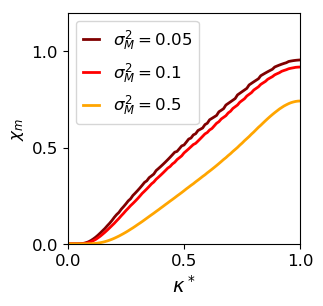

In [14]:
figure(figsize=(3, 3))

kstar_range = 0:0.01:1
s2M_range = [5e-2,1e-1,.5]
colors = ["maroon","r","orange"]
for (s2M,col) in zip(s2M_range,colors)
    plot(kstar_range, [exp(evodi.value_logchi(kstar, 0., evodi.value_c_star(kstar, s2M), s2M, sex="male")) 
         for kstar in kstar_range], label=L"$\sigma_M^2=$"*"$(s2M)", lw=2, color=col);
end
xlim([0,1]); ylim([0,1.2]); xticks(0:0.5:1, fontsize=12); yticks(0:0.5:1, fontsize=12);
xlabel(L"$\kappa^*$", fontsize=14); ylabel(L"$\chi_m$", fontsize=12); 
legend(fontsize=12,handlelength=1); 

## Figure S1A

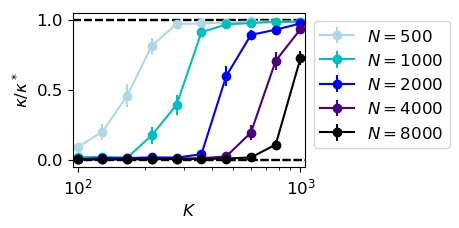

In [15]:
N_values = [500, 1000, 2000, 4000, 8000]

col_m = ["lightblue","c","b","indigo","k"]
figure(figsize=(3, 2))
for (i,N) in enumerate(N_values)
    filename = "data_figS1_$(N)"
    res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)
    axhline(0, ls="--", color="k")
    axhline(1, ls="--", color="k")
    errorbar(K_values, [mean(res_km[K])/kstar for K in K_values], 
             yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", 
             markersize=12, color=col_m[i], label=L"$N=$"*"$N");
    end
xticks([1e2,1e3],fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log");
legend(fontsize=12,bbox_to_anchor=(1,1), loc="upper left"); xlim([.95*1e2,1.05*1e3]); 
xlabel(L"$K$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure S1B

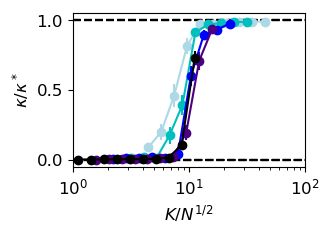

In [16]:
α = -.5

col_m = ["lightblue","c","b","indigo","k"]
figure(figsize=(3, 2))
for (i,N) in enumerate(N_values)
    filename = "data_figS1_$(N)"
    res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)
    axhline(0, ls="--", color="k")
    axhline(1, ls="--", color="k")
    errorbar(K_values*N^α, [mean(res_km[K])/kstar for K in K_values], 
             yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", 
              markersize=12, color=col_m[i]);
    xticks(0:.5:1, fontsize=12); yticks([0,.5,1], fontsize=12);xscale("log");
end
xlim([1,100]);
xlabel(L"$K/N^{1/2}$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure S1C

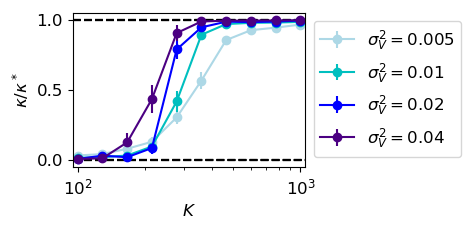

In [17]:
s2V_values = [0.005, 0.01, 0.02, 0.04]#, 0.08]
K_values = [10^i for i in range(2,stop=3,length=10)]

col_m = ["lightblue","c","b","indigo","k"]
figure(figsize=(3, 2))
for (i,s2V) in enumerate(s2V_values)
    filename = "data_figS1_$(s2V)"
    res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)
    axhline(0, ls="--", color="k")
    axhline(1, ls="--", color="k")
    errorbar(K_values, [mean(res_km[K])/kstar for K in K_values], yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", 
            markersize=12, color=col_m[i], label=L"$\sigma_V^2=$"*"$(s2V)");   
end
xticks(fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log"); 
xlim([.95*1e2,1.05*1e3]); legend(fontsize=12,bbox_to_anchor=(1,1), loc="upper left");
xlabel(L"$K$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure S1D

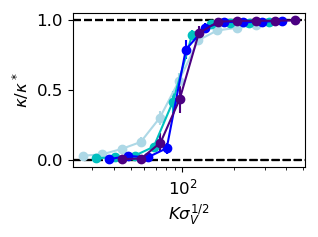

In [18]:
α = .25

s2V_values = [0.005, 0.01, 0.02, 0.04]#, 0.08]
K_values = [10^i for i in range(2,stop=3,length=10)]

col_m = ["lightblue","c","b","indigo","k"]
figure(figsize=(3, 2))
for (i,s2V) in enumerate(s2V_values)
    filename = "data_figS1_$(s2V)"
    res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)
    axhline(0, ls="--", color="k")
    axhline(1, ls="--", color="k")
    errorbar(K_values*(s2V)^α, [mean(res_km[K])/kstar for K in K_values], yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", 
            markersize=12, color=col_m[i], label=L"$\sigma_V^2=$"*"$(s2V)");    
end
xticks(fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log");
xlabel(L"$K\sigma_V^{1/2}$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure S2

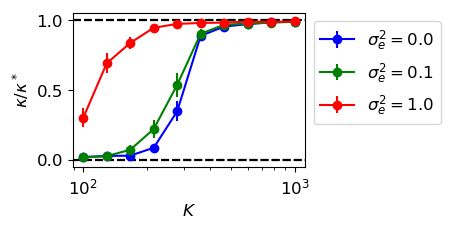

In [19]:
s2e_values = [0., 0.1, 1.]
K_values = [10^i for i in range(2,stop=3,length=10)]

col_m = ["b","g","r"]
figure(figsize=(3, 2))
for (i,s2e) in enumerate(s2e_values)
    filename = "data_figS2_$(s2e)"
    res_kf, res_km = evodi.simu_kappa_read(filename, K_values, T, Nstat)
    axhline(0, ls="--", color="k")
    axhline(1, ls="--", color="k")
    errorbar(K_values, [mean(res_km[K])/kstar for K in K_values], yerr=[std(res_km[K]/kstar)/sqrt(Nstat) for K in K_values], marker=".", 
            markersize=12, color=col_m[i], label=L"$\sigma_e^2=$"*"$(s2e)");
    xticks(fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log"); 
end
legend(fontsize=12,bbox_to_anchor=(1,1), loc="upper left");
xlabel(L"$K$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Fig S3A

In [20]:
function simu_kappa_read_migr(filename, K, T, Nstat, prog_mig_values)
    # irrespectively of u_soft and therefore meaningful only if common value of u_soft
    res_km, res_kf = Dict(prob_mig=>[] for prob_mig in prog_mig_values), Dict(prob_mig=>[] for prob_mig in prog_mig_values)
    filename = "_Outputs/"*filename*".txt"
    open(filename) do f
        for (i,line) in enumerate(eachline(f))
            if i > 1
                time = parse(Int, split(line)[8])
                if time == T
                    prob_mig = parse(Float64, split(line)[5])
                    kf = parse(Float64, split(line)[9])
                    km = parse(Float64, split(line)[10])
                    push!(res_kf[prob_mig], kf)
                    push!(res_km[prob_mig], km)
                end
            end
        end
    end
    return res_kf, res_km
end   

function simu_kappa_read_usoft(filename, K, T, Nstat, u_soft_values)
    # irrespectively of prog_mig and therefore meaningful only if common value of prog_mig
    res_km, res_kf = Dict(u_soft=>[] for u_soft in u_soft_values), Dict(u_soft=>[] for u_soft in u_soft_values)
    filename = "_Outputs/"*filename*".txt"
    open(filename) do f
        for (i,line) in enumerate(eachline(f))
            if i > 1
                time = parse(Int, split(line)[8])
                if time == T
                    u_soft = parse(Float64, split(line)[6])
                    kf = parse(Float64, split(line)[9])
                    km = parse(Float64, split(line)[10])
                    push!(res_kf[u_soft], kf)
                    push!(res_km[u_soft], km)
                end
            end
        end
    end
    return res_kf, res_km
end

function simu_kappa_read_comb(filename, K, T, Nstat, prob_mig_values, u_soft_values)
    pm2i = Dict(pm=>i for (i,pm) in enumerate(prob_mig_values))
    us2j = Dict(us=>j for (j,us) in enumerate(u_soft_values))
    res_km, res_kf = zeros(length(pm2i), length(us2j)), zeros(length(pm2i), length(us2j))
    filename = "_Outputs/"*filename*".txt"
    open(filename) do f
        for (i,line) in enumerate(eachline(f))
            if i > 1
                time = parse(Int, split(line)[8])
                if time == T
                    prob_mig = parse(Float64, split(line)[5])
                    u_soft = parse(Float64, split(line)[6])
                    kf = parse(Float64, split(line)[9])
                    km = parse(Float64, split(line)[10])
                    res_kf[pm2i[prob_mig],us2j[u_soft]] += kf
                    res_km[pm2i[prob_mig],us2j[u_soft]] += km
                end
            end
        end
    end
    return res_kf/Nstat, res_km/Nstat
end             

simu_kappa_read_comb (generic function with 1 method)

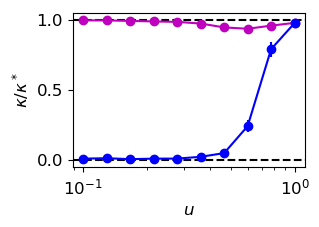

In [21]:
K = 100
u_soft_values = [10^i for i in range(-1,stop=0,length=10)]
prob_mig_values = [0]

filename = "data_figS3A"
res_kf, res_km = simu_kappa_read_usoft(filename, K, T, Nstat, u_soft_values)

figure(figsize=(3, 2))
axhline(0, ls="--", color="k")
axhline(1, ls="--", color="k")
errorbar(u_soft_values, [mean(res_kf[u_soft])/kstar for u_soft in u_soft_values], yerr=[std(res_kf[u_soft]/kstar)/sqrt(Nstat) for u_soft in u_soft_values], marker=".", markersize=12, color="m")
errorbar(u_soft_values, [mean(res_km[u_soft])/kstar for u_soft in u_soft_values], yerr=[std(res_km[u_soft]/kstar)/sqrt(Nstat) for u_soft in u_soft_values], marker=".", markersize=12, color="b");
xticks(0:.1:1, fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log");
xlabel(L"$u$",fontsize=12); ylabel(L"$\kappa/\kappa^*$",fontsize=12);

## Figure S3B

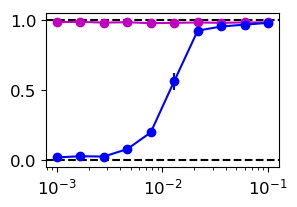

In [22]:
K = 100
u_soft_values = [0]
prob_mig_values = [10^i for i in range(-3,stop=-1,length=10)]

filename = "data_figS3B"
res_kf, res_km = simu_kappa_read_migr(filename, K, T, Nstat, prob_mig_values)

figure(figsize=(3, 2))
axhline(0, ls="--", color="k")
axhline(1, ls="--", color="k")
errorbar(prob_mig_values, [mean(res_kf[prob_mig])/kstar for prob_mig in prob_mig_values], yerr=[std(res_kf[prob_mig]/kstar)/sqrt(Nstat) for prob_mig in prob_mig_values], marker=".", markersize=12, color="m")
errorbar(prob_mig_values, [mean(res_km[prob_mig])/kstar for prob_mig in prob_mig_values], yerr=[std(res_km[prob_mig]/kstar)/sqrt(Nstat) for prob_mig in prob_mig_values], marker=".", markersize=12, color="b");
xticks(0:.1:1, fontsize=12); yticks([0,.5,1], fontsize=12); xscale("log");


## Figure S3C

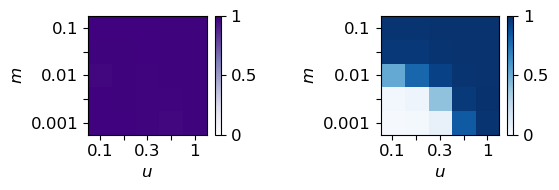

In [23]:
K = 100
u_soft_values = [10^i for i in range(-1,stop=0,length=5)]
prob_mig_values = [10^i for i in range(-3,stop=-1,length=5)]

filename = "data_figS3C"
res_kf, res_km = simu_kappa_read_comb(filename, K, T, Nstat, prob_mig_values, u_soft_values)

figure(figsize=(6, 2))
subplot(1,2,1)
imshow(res_kf/kstar, vmin=0, vmax=1, origin="lower", cmap="Purples"); 
cbar = colorbar(ticks=[0, 0.5, 1],fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticklabels(["0","0.5","1"]);
xticks(0:4, ["0.1","","0.3","","1"], fontsize=12);
yticks(0:4, ["0.001","","0.01","","0.1"], fontsize=12);
xlabel(L"$u$",fontsize=12); ylabel(L"$m$",fontsize=12);
subplot(1,2,2)
imshow(res_km/kstar, vmin=0, vmax=1, origin="lower", cmap="Blues");
cbar = colorbar(ticks=[0, 0.5, 1],fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticklabels(["0","0.5","1"]);
xticks(0:4, ["0.1","","0.3","","1"], fontsize=12);
yticks(0:4, ["0.001","","0.01","","0.1"], fontsize=12);
xlabel(L"$u$",fontsize=12); ylabel(L"$m$",fontsize=12);
tight_layout();